Module Import
___
This cell imports several essential libraries and modules commonly used in data analysis, machine learning, and visualization tasks. Here's a breakdown of its components:

1. **Core Libraries**: 
   - `pandas` (imported as `pd`) is a powerful library for data manipulation and analysis, offering data structures like DataFrames for handling tabular data.

2. **Visualization**:
   - `matplotlib.pyplot` (imported as `plt`) is a widely used library for creating static, interactive, and animated visualizations in Python.

3. **Date and Time Handling**:
   - `datetime` is a standard Python module for working with dates and times.

4. **Warnings Management**:
   - The `warnings` module is used to control the behavior of warning messages. The `simplefilter` function is called to suppress `UserWarning` messages by setting the action to `"ignore"`. This is useful in scenarios where non-critical warnings might clutter the output.

5. **Machine Learning Libraries**:
   - `xgboost` is a popular library for gradient boosting, often used in machine learning tasks for its efficiency and performance.
   - `sklearn.metrics` provides various metrics for evaluating machine learning models. Specific metrics imported here include:
     - `accuracy_score` for classification performance.
     - ``roc_auc_score` for evaluating classification models using Receiver Operating Characteristic (ROC) curves.
   - `sklearn.model_selection` includes tools like `train_test_split` for splitting datasets into training and testing subsets.

6. **Type Ignoring**:
   - The `# type: ignore` comments are used to suppress type-checking warnings from tools like `mypy`. This is often done when type annotations are not provided or when the imported modules might cause false positives in type-checking.

Overall, this setup prepares the environment for a machine learning workflow, including data preprocessing, model training, evaluation, and visualization, while suppressing unnecessary warnings to maintain a clean output.

In [1]:
import pandas                  as     pd                              # type: ignore
from   datetime                import datetime
import warnings 
import xgboost                                                         # type: ignore
from   sklearn.metrics         import accuracy_score                   # type: ignore
from   sklearn.metrics         import roc_auc_score                    # type: ignore
from   sklearn.model_selection import train_test_split                 # type: ignore
from   sklearn.preprocessing   import LabelEncoder                    # type: ignore
warnings.simplefilter(action="ignore", category=UserWarning)

Dataset Import
Using the Diabetes dataset.
___
This line of code uses the `read_csv` function from the `pandas` library to load data from a CSV file named `"diabetes.csv"` into a DataFrame object, which is assigned to the variable `df`. A DataFrame is a two-dimensional, tabular data structure in pandas that is widely used for data manipulation and analysis.

The `read_csv` function is highly versatile and can handle various parameters to customize how the CSV file is read. In this case, no additional arguments are provided, so the function uses its default settings. By default:
- The first row of the CSV file is assumed to contain column headers, which are used as the column names in the DataFrame.
- The data is read as-is, with no specific parsing or transformations applied.

This operation is typically the first step in a data analysis or machine learning workflow, as it loads the raw data into memory for further processing. The `"diabetes.csv"` file likely contains information relevant to the diabetes dataset, such as patient attributes and outcomes, which will be used in subsequent steps for analysis or model training. 

If the file is not located in the same directory as the script or notebook, a `FileNotFoundError` will occur, and the file path will need to be adjusted accordingly.

In [2]:
df = pd.read_csv("diabetes.csv")

Data Frame Information
___
The `df.info()` method is a built-in function in pandas that provides a concise summary of a DataFrame. When called on the `df` DataFrame, it outputs key information about the dataset, which is useful for understanding its structure and contents. This method is particularly helpful during the initial stages of data exploration.

The summary includes:
1. **Index and Column Details**: It displays the range of the DataFrame's index and lists all column names along with their data types (e.g., integers, floats, objects).
2. **Non-Null Counts**: For each column, it shows the number of non-null (non-missing) entries, helping identify columns with missing data.
3. **Data Types**: It specifies the data type of each column, such as `int64`, `float64`, or `object` (used for strings or mixed data types).
4. **Memory Usage**: It provides an estimate of the memory consumed by the DataFrame, which is useful for optimizing performance when working with large datasets.

The `# type: ignore` comment is used to suppress type-checking warnings from tools like `mypy`. This might be necessary if the type-checker raises false positives or if type annotations are not fully compatible with the code.

In this context, calling `df.info()` on the diabetes dataset allows the user to quickly assess the dataset's structure, identify missing values, and verify that the data types align with the intended analysis or machine learning workflow.

In [3]:
df.info() # type: ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


More Data Frame Information
___
The `df.head(6)` method is a pandas function that retrieves the first `n` rows of a DataFrame, where `n` is specified as an argument. In this case, the argument `6` instructs the method to return the first six rows of the `df` DataFrame. If no argument is provided, the default value is `5`, meaning it would return the first five rows.

This method is commonly used during the initial stages of data exploration to quickly inspect the structure and contents of a dataset. It allows the user to view a sample of the data, including column names, data types, and representative values, without loading the entire dataset into the output.

The `# type: ignore` comment is included to suppress type-checking warnings from tools like `mypy`. This might be necessary if the type-checker raises false positives or if type annotations are not fully compatible with the code.

In this context, calling `df.head(6)` on the diabetes dataset provides a quick preview of the first six rows, helping the user verify that the data has been loaded correctly and gain an initial understanding of its structure and content.

In [4]:
df.head(6) # type: ignore

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


Show Percentage Distribution of Outcome
___
This cell calculates and displays the percentage distribution of the values in the `Outcome` column of the `df` DataFrame. Here's a detailed explanation of each step:

1. **Counting Unique Values**:
   - The `df['Outcome'].value_counts()` method counts the occurrences of each unique value in the `Outcome` column. The result is a pandas Series where the index represents the unique values, and the corresponding values represent their counts. For example, if the `Outcome` column contains binary values (e.g., `0` for no diabetes and `1` for diabetes), this method will return the count of `0`s and `1`s.

2. **Calculating Percentages**:
   - The `counts / counts.sum() * 100` operation converts the raw counts into percentages. The `counts.sum()` method calculates the total number of entries in the `Outcome` column. Dividing each count by this total and multiplying by 100 gives the percentage of each unique value relative to the total.

3. **Displaying the Results**:
   - The `print(outcomes)` statement outputs the resulting percentages to the console. The `outcomes` variable is a pandas Series where the index represents the unique values in the `Outcome` column, and the values represent their respective percentages.

This code is particularly useful for understanding the class distribution in a classification problem. For example, in the context of a diabetes dataset, it helps determine whether the dataset is balanced (i.e., similar percentages for each class) or imbalanced (i.e., one class significantly outnumbers the other). This information is crucial for selecting appropriate machine learning models and evaluation metrics.

In [5]:
counts = df['Outcome'].value_counts()
outcomes = counts / counts.sum() * 100
print(outcomes)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64


Training and Test Datasets

Let's split the data 70/30 into a training set (which we will use to build models) and a test set (on which we will evaluate any model we build).
___
This cell separates the features (independent variables) and the target (dependent variable) from the `df` DataFrame, which is a common preprocessing step in machine learning workflows.

1. **Dropping the Target Column**:
   - The `df.drop(['Outcome'], axis=1)` method creates a new DataFrame by removing the `Outcome` column from `df`. The `axis=1` argument specifies that the operation should be performed on columns (as opposed to rows, which would require `axis=0`). The resulting DataFrame, assigned to the variable `X`, contains all the features (independent variables) that will be used to train the machine learning model.

2. **Extracting the Target Column**:
   - The `df['Outcome']` expression selects the `Outcome` column from the `df` DataFrame and assigns it to the variable `y`. This column represents the target variable, which the model will learn to predict. In the context of the diabetes dataset, the `Outcome` column likely contains binary values (e.g., `0` for no diabetes and `1` for diabetes).

By separating the features (`X`) and the target (`y`), this code prepares the data for further steps such as splitting into training and testing sets, feature scaling, and model training. This separation is essential because the target variable should not be included in the feature set during model training to avoid data leakage.

In [6]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

This cell uses the `LabelEncoder` class from `sklearn.preprocessing` to encode the target variable `y` into a numerical format. This is a common preprocessing step in machine learning workflows, especially when the target variable contains categorical labels.

1. **Creating an Instance of `LabelEncoder`**:
   - The `LabelEncoder` object is instantiated and assigned to the variable `label_encoder`. This object will be used to fit the target variable and transform its labels into numerical values.

2. **Fitting the Encoder**:
   - The `fit` method is called on the `label_encoder` object with `y` as the input. This method analyzes the unique values in `y` and stores them in the `classes_` attribute of the encoder. For example, if `y` contains labels like `["yes", "no", "yes"]`, the encoder will identify the unique classes as `["no", "yes"]`.

3. **Transforming the Labels**:
   - The `transform` method is then called on `label_encoder` with `y` as the input. This method maps each label in `y` to its corresponding numerical value based on the order of the unique classes identified during the `fit` step. For instance, if the classes are `["no", "yes"]`, the label `no` will be encoded as `0` and `yes` as `1`. The transformed labels are then reassigned to the variable `y`.

The `# type: ignore` comments are included to suppress type-checking warnings from tools like `mypy`. This might be necessary if the type-checker raises false positives or if type annotations are not fully compatible with the code.

In summary, this code converts the categorical target variable `y` into a numerical format, which is required by most machine learning algorithms. This transformation ensures that the model can process the target variable effectively during training and evaluation.

In [7]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)       # type: ignore
y             = label_encoder.transform(y) # type: ignore

This code performs a crucial step in preparing data for machine learning by splitting the dataset into training and testing subsets. Here's a detailed explanation of each line:

1. **Splitting the Dataset**:
   - The `train_test_split` function from `sklearn.model_selection` is used to split the features (`X`) and target (`y`) into training and testing sets. 
   - The `test_size=0.3` parameter specifies that 30% of the data will be allocated to the test set, while the remaining 70% will be used for training.
   - The `random_state=7` parameter ensures reproducibility by controlling the random shuffling of the data. Using the same `random_state` value across runs guarantees that the split will be identical each time.

   The function returns four outputs:
   - `X_train`: The training subset of the features.
   - `X_test`: The testing subset of the features.
   - `y_train`: The training subset of the target variable.
   - `y_test`: The testing subset of the target variable.

2. **Evaluation Set**:
   - The `eval_set` variable is defined as a list containing a tuple of `X_test` and `y_test`. This is often used in machine learning workflows to evaluate the model's performance on unseen data during training or validation.

3. **Printing Shapes**:
   - The `print(X_train.shape, X_test.shape)` statement outputs the dimensions of the training and testing feature sets. The `.shape` attribute of a pandas DataFrame or NumPy array returns a tuple representing the number of rows (samples) and columns (features). This helps verify that the data has been split correctly and that the proportions align with the specified `test_size`.

In summary, this code prepares the data for model training and evaluation by creating separate training and testing subsets, ensuring reproducibility, and providing a quick check of the resulting dataset sizes.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
eval_set = [(X_test, y_test)]
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


This code trains an XGBoost classifier on a dataset, evaluates its performance, and outputs key metrics along with the training duration. Here's a detailed explanation:

1. **Initialization and Timer Start**:
   - The `print` statement indicates the start of the training process for the XGBoost classifier.
   - The `datetime.now()` function records the current time in the variable `st`, which will later be used to calculate the total training time.

2. **XGBoost Classifier Setup**:
   - An instance of `xgboost.XGBClassifier` is created and assigned to the variable `clf`. The classifier is configured with the following hyperparameters:
     - `objective="binary:logistic"`: Specifies that the task is binary classification, and the model will output probabilities.
     - `learning_rate=0.05`: Controls the step size during optimization, balancing convergence speed and accuracy.
     - `seed=9616`: Ensures reproducibility by setting a random seed.
     - `max_depth=20`: Limits the maximum depth of each decision tree, controlling model complexity and overfitting.
     - `gamma=10`: Adds a regularization term to control tree splitting, reducing overfitting.
     - `n_estimators=500`: Specifies the number of boosting rounds (trees) to build.

3. **Evaluation Set**:
   - The `eval_set` variable is defined as a list containing a tuple of `X_test` and `y_test`. This set will be used to monitor the model's performance on unseen data during training.

4. **Model Training**:
   - The `clf.fit` method trains the XGBoost classifier using the training data (`X_train` and `y_train`). The `eval_set` is passed to evaluate the model's performance during training. The `verbose=False` parameter suppresses detailed training output.

5. **Predictions**:
   - The `clf.predict` method generates predictions (`y_pred`) for the test dataset (`X_test`).
   - The `clf.predict_proba` method calculates the predicted probabilities for each class. The `[1]` index extracts the probabilities for the positive class (e.g., diabetes present).

6. **Performance Metrics**:
   - The `accuracy_score` function computes the accuracy of the predictions (`y_pred`) compared to the true labels (`y_test`).
   - The `roc_auc_score` function calculates the Receiver Operating Characteristic - Area Under the Curve (ROC-AUC) score using the predicted probabilities (`y_pred_proba`). This metric evaluates the model's ability to distinguish between classes.

7. **Training Time and Results**:
   - The total training time is calculated as the difference between the current time (`datetime.now()`) and the start time (`st`).
   - The `print` statements display the training time, accuracy, and ROC-AUC score, formatted as percentages with high precision.

In summary, this code trains an XGBoost classifier, evaluates its performance on the test dataset, and outputs key metrics (accuracy and ROC-AUC) along with the training duration. These steps are essential for assessing the model's effectiveness and efficiency.

In [9]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')
st  = datetime.now()
clf = xgboost.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500
)
eval_set = [(X_test, y_test)]
clf.fit(X_train, y_train, eval_set=eval_set, verbose=False)
# Predictions
# Accuracy and ROC-AUC
y_pred       = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
accuracy     = accuracy_score(y_test, y_pred)
roc_auc      = roc_auc_score(y_test, y_pred_proba)
print('Training time:', datetime.now() - st)
print("Accuracy     : %.10f%%" % (accuracy * 100.0))
print("ROC-AUC      : %.10f%%" % (roc_auc * 100))

Initializing xgboost.sklearn.XGBClassifier and starting training...
Training time: 0:00:00.122716
Accuracy     : 74.0259740260%
ROC-AUC      : 82.3534175575%


#### View the results of your model

The `xgboost.plot_importance(clf)` function generates a bar chart to visualize the importance of features used by the trained XGBoost model (`clf`). This visualization helps identify which features contribute the most to the model's predictions, providing insights into the dataset and the model's decision-making process.

1. **Feature Importance**:
   - The function calculates feature importance based on the fitted trees in the XGBoost model. By default, the importance is measured using the "weight" metric, which counts the number of times each feature is used in tree splits. Other metrics, such as "gain" (average improvement in accuracy from splits) or "cover" (average number of samples affected by splits), can also be used.

2. **Visualization**:
   - The function creates a horizontal bar chart where:
     - The y-axis lists the feature names.
     - The x-axis represents the importance score of each feature.
   - Features with higher importance scores appear at the top, making it easy to identify the most influential features.

3. **Customization**:
   - The `plot_importance` function provides several optional parameters (e.g., `title`, `xlabel`, `ylabel`, `max_num_features`) to customize the plot. However, in this case, the default settings are used.

4. **Purpose**:
   - This visualization is particularly useful for understanding the model's behavior and for feature selection. For example, less important features might be removed to simplify the model or improve computational efficiency.

The `# type: ignore` comment suppresses type-checking warnings, likely because the `plot_importance` function may not have explicit type annotations compatible with the user's type-checking tool.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

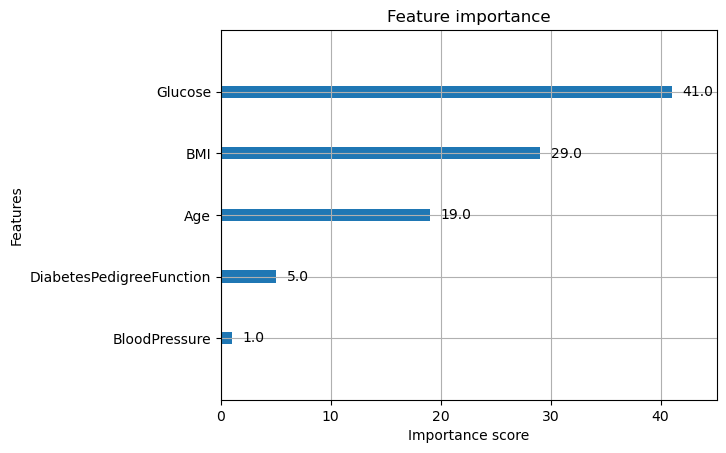

In [10]:
xgboost.plot_importance(clf) # type: ignore